In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
#subject = subject number
#type = VR or Non-VR
def loadSubjectData(subject, type):
    path = "Pre-Processed Data/subject-"+subject+"/"+type+"/Subject-"+subject+"_"+type+".fif"
    raw = mne.io.read_raw_fif(path, preload=True, verbose='error')
    return raw

#load specific channel, would be better if channel could be named instead of giving an index
def loadChannelData(raw, ch):
    ch_names = raw.info['ch_names']
    dataset=[]
    raw.load_data()
    temp = copy.deepcopy(raw)
    raw_pick = temp.pick_channels([ch_names[ch]])
    start, stop = raw_pick.time_as_index([5,175])
    picks = mne.pick_types(raw_pick.info, eeg=True, exclude=[])
    data, times = raw_pick[picks[:], start:stop]
    dataset = data[0]
    dataset = trimData(dataset)
    return dataset;
    
#trim any outliers that go beyond -100 and 100
def trimData(data):
    data = list(data)
    y=len(data)
    x=0
    while x < y:
        if(data[x]>100 or data[x]<-100):
            data.pop(x)
            x-=1
            y=len(data)
        x+=1
    return data

In [45]:
#Change subject, VR/Non-VR, and channel here
subject = loadSubjectData("8","Non-VR")
channel = loadChannelData(subject, 2)

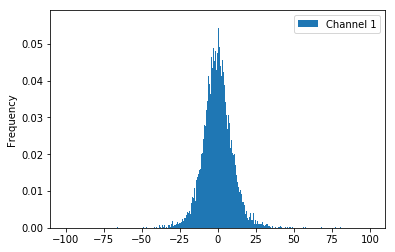

In [49]:
df = pd.DataFrame(channel)
df.columns = ['Channel 1']
density, division = np.histogram(df, range=(-100,100), bins=1000, density=True)
df.plot(kind='hist', density=True, bins=division)

df2 = pd.DataFrame(data=[division,density])
d = df2.transpose()
d.dropna(inplace=True)
#print all
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(d)

In [50]:
#cross_val_score requires int
#only run this once
for i in range(len(d[1])):
    d[1][i]= int(d[1][i]*1000000)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, d, d[1], scoring='accuracy', cv=3)
print("Accuracy: {0:.1f}%".format(np.mean(scores) * 100))

Accuracy: 80.7%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
